# 비행기 경로

- 개별로 저장되어 있는 파일을 읽어 해당되는 비행기 경로와 착률지점을 추가하고 저장

***

## 사용함수

- 비행기 경로 추가

In [1]:
def 비행기경로(비행기):
    dfy = 비행기["Y"]
    dfX = sm.add_constant(비행기["X"])
    model = sm.OLS(dfy, dfX)
    result = model.fit()
    
    ## 비행기 그리기
    xx = np.linspace(0,816000,816000)
    
    plt.figure(figsize = (12, 12))
    plt.xlim((0, 816000))
    plt.ylim((816000, 0))
    plt.plot(xx, result.predict(sm.add_constant(xx)))
    plt.grid(False)

    xx = np.linspace(0, 816000, 9)
    yy = np.linspace(0, 816000, 9)

    for i in xx:
        plt.plot([i, i], [0, 816000], 'g--', lw=0.5)
    for i in yy:
        plt.plot([0, 816000], [i, i], 'g--', lw=0.5)

    plt.show()

- 좌표를 읽어 문자열을 반환하는 알고리즘

In [2]:
def X1기준좌표반환(point):
    limit_ls = np.linspace(0, 816000, 9)
    if limit_ls[0] <= point < limit_ls[1]:
        return "AA"
    if limit_ls[1] <= point < limit_ls[2]:
        return "BA"
    if limit_ls[2] <= point < limit_ls[3]:
        return "CA"
    if limit_ls[3] <= point < limit_ls[4]:
        return "DA"
    if limit_ls[4] <= point < limit_ls[5]:
        return "EA"
    if limit_ls[5] <= point < limit_ls[6]:
        return "FA"
    if limit_ls[6] <= point < limit_ls[7]:
        return "GA"
    if limit_ls[7] <= point <= limit_ls[8]:
        return "HA"
    
def X2기준좌표반환(point):
    limit_ls = np.linspace(0, 816000, 9)
    if limit_ls[0] <= point < limit_ls[1]:
        return "AH"
    if limit_ls[1] <= point < limit_ls[2]:
        return "BH"
    if limit_ls[2] <= point < limit_ls[3]:
        return "CH"
    if limit_ls[3] <= point < limit_ls[4]:
        return "DH"
    if limit_ls[4] <= point < limit_ls[5]:
        return "EH"
    if limit_ls[5] <= point < limit_ls[6]:
        return "FH"
    if limit_ls[6] <= point < limit_ls[7]:
        return "GH"
    if limit_ls[7] <= point < limit_ls[8]:
        return "HH"
    
def Y아래기준좌표반환(point):
    limit_ls = np.linspace(0, 816000, 9)
    if limit_ls[0] <= point < limit_ls[1]:
        return "HA"
    if limit_ls[1] <= point < limit_ls[2]:
        return "HB"
    if limit_ls[2] <= point < limit_ls[3]:
        return "HC"
    if limit_ls[3] <= point < limit_ls[4]:
        return "HD"
    if limit_ls[4] <= point < limit_ls[5]:
        return "HE"
    if limit_ls[5] <= point < limit_ls[6]:
        return "HF"
    if limit_ls[6] <= point < limit_ls[7]:
        return "HG"
    if limit_ls[7] <= point < limit_ls[8]:
        return "HH"
    
def Y위기준좌표반환(point):
    limit_ls = np.linspace(0, 816000, 9)
    if limit_ls[0] <= point < limit_ls[1]:
        return "AA"
    if limit_ls[1] <= point < limit_ls[2]:
        return "AB"
    if limit_ls[2] <= point < limit_ls[3]:
        return "AC"
    if limit_ls[3] <= point < limit_ls[4]:
        return "AD"
    if limit_ls[4] <= point < limit_ls[5]:
        return "AE"
    if limit_ls[5] <= point < limit_ls[6]:
        return "AF"
    if limit_ls[6] <= point < limit_ls[7]:
        return "AG"
    if limit_ls[7] <= point < limit_ls[8]:
        return "HH"

- 입력값을 정리해서 해당되는 알고리즘을 사용하는 함수

In [3]:
def 좌표반환(xpoint1, xpoint2):
    result1 = ''
    result2 = ''
    
    if 0 < xpoint1 < 816000:
        ## x값 기준으로 하는 함수 사용
        result1 = X1기준좌표반환(xpoint1)
    else:
        ## y값 기준으로 하는 함수 사용
        dfy = airplane_df["X"]
        dfX = sm.add_constant(airplane_df["Y"])
        model = sm.OLS(dfy, dfX)
        result = model.fit()

        if xpoint1 >= 816000:
            ypoint1 = result.predict([1, 816000])[0]
            result1 = Y아래기준좌표반환(ypoint1)
            
        else:
            ypoint1 = result.predict([1, 0])[0]
            result1 = Y위기준좌표반환(ypoint1)
        

    if 0 < xpoint2 < 816000:
        ## x값 기준으로 하는 함수 사용
        result2 = X2기준좌표반환(xpoint2)
    else:
        ## y값 기준으로 하는 함수 사용
        dfy = airplane_df["X"]
        dfX = sm.add_constant(airplane_df["Y"])
        model = sm.OLS(dfy, dfX)
        result = model.fit()

        if xpoint2 >= 816000:
            ypoint2 = result.predict([1, 816000])[0]
            result2 = Y아래기준좌표반환(ypoint2)
            
        else:
            ypoint2 = result.predict([1, 0])[0]
            result2 = Y위기준좌표반환(ypoint2)
        
    return result1, result2

- 유져좌표 판별 함수

In [4]:
def 유져좌표(y):
    lim = np.linspace(0, 816000, 9)
    
    if y <= lim[1]:
        str_1 = "A"
    elif lim[1] < y <= lim[2]:
        str_1 = "B"
    elif lim[2] < y <= lim[3]:
        str_1 = "C"
    elif lim[3] < y <= lim[4]:
        str_1 = "D"
    elif lim[4] < y <= lim[5]:
        str_1 = "E"
    elif lim[5] < y <= lim[6]:
        str_1 = "F"
    elif lim[6] < y <= lim[7]:
        str_1 = "G"
    elif lim[7] < y <= lim[8]:
        str_1 = "H"
    return str_1

***

## 메인 코드

In [5]:
방향 = [] # 저장한 코드의 통계를 확인하는 리스트
for number in range(1, 3231): # 읽을 개수만큼 설정
    if number % 100 == 0:
        print(number)
        
    # 파일 읽기
    airplane_df = pd.read_csv("datas3/airplane_{}.csv".format(number), encoding = "euc-kr")
    location_df = pd.read_csv("datas3/location_{}.csv".format(number), encoding ="euc-kr")

    if airplane_df["X"][0] < 0: # 비행기 시작 위치가 왼쪽인지 오른쪽인지 파악하는 함수
        point_key = True
    elif airplane_df["X"][0] > 816000:
        point_key = False
    else:  ## 직선의 시작지점을 판별하는 키
        dfy = airplane_df["X"]
        dfX = sm.add_constant(airplane_df["Y"])
        model = sm.OLS(dfy, dfX)
        result = model.fit() ## 선형 회귀분석을 통해 직선을 예측
        if airplane_df["X"][0] >= (result.predict([1, 0])[0] + result.predict([1, 816000])[0]) / 2:
            point_key = False
        else:
            point_key = True
        
    dfy = airplane_df["Y"]
    dfX = sm.add_constant(airplane_df["X"])
    model = sm.OLS(dfy, dfX)
    result = model.fit()
    
    xpoint1 = result.predict([1, 0])[0]
    xpoint2 = result.predict([1, 816000])[0]
    
    ## 직선의 좌표를 반환
    result = 좌표반환(xpoint1, xpoint2)

    if point_key: # 비행기 시작점과 끝점을 판별하여 저장
        result = "".join(result)
    else:
        result = "".join(result[::-1])
    방향.append(result)
    location_df["total_numb"] = len(location_df)
    location_df["airplane"] = result
    ## 착츅위치를 판별하여 저장
    location_df["player_location"] = location_df["y"].apply(lambda data : 유져좌표(data)) + location_df["x"].apply(lambda data : 유져좌표(data))
    # location_df.to_csv("1차_전처리_2/location_{}.csv".format(number), index = False, encoding ="euc-kr")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200


***

## 일부 데이터 분석

In [6]:
len(방향)

3230

In [11]:
pd.Series(방향).value_counts()

AAHH    40
HHAA    36
AEHE    32
HDAD    31
DHCA    31
        ..
HFAF     1
HHAE     1
HCCH     1
HBCH     1
FAAF     1
Length: 212, dtype: int64

In [22]:
방향 = pd.DataFrame(방향, columns = ["방향"]).groupby("방향").size().reset_index(name = "count")

In [26]:
방향 = 방향.sort_values("count", ascending = False)

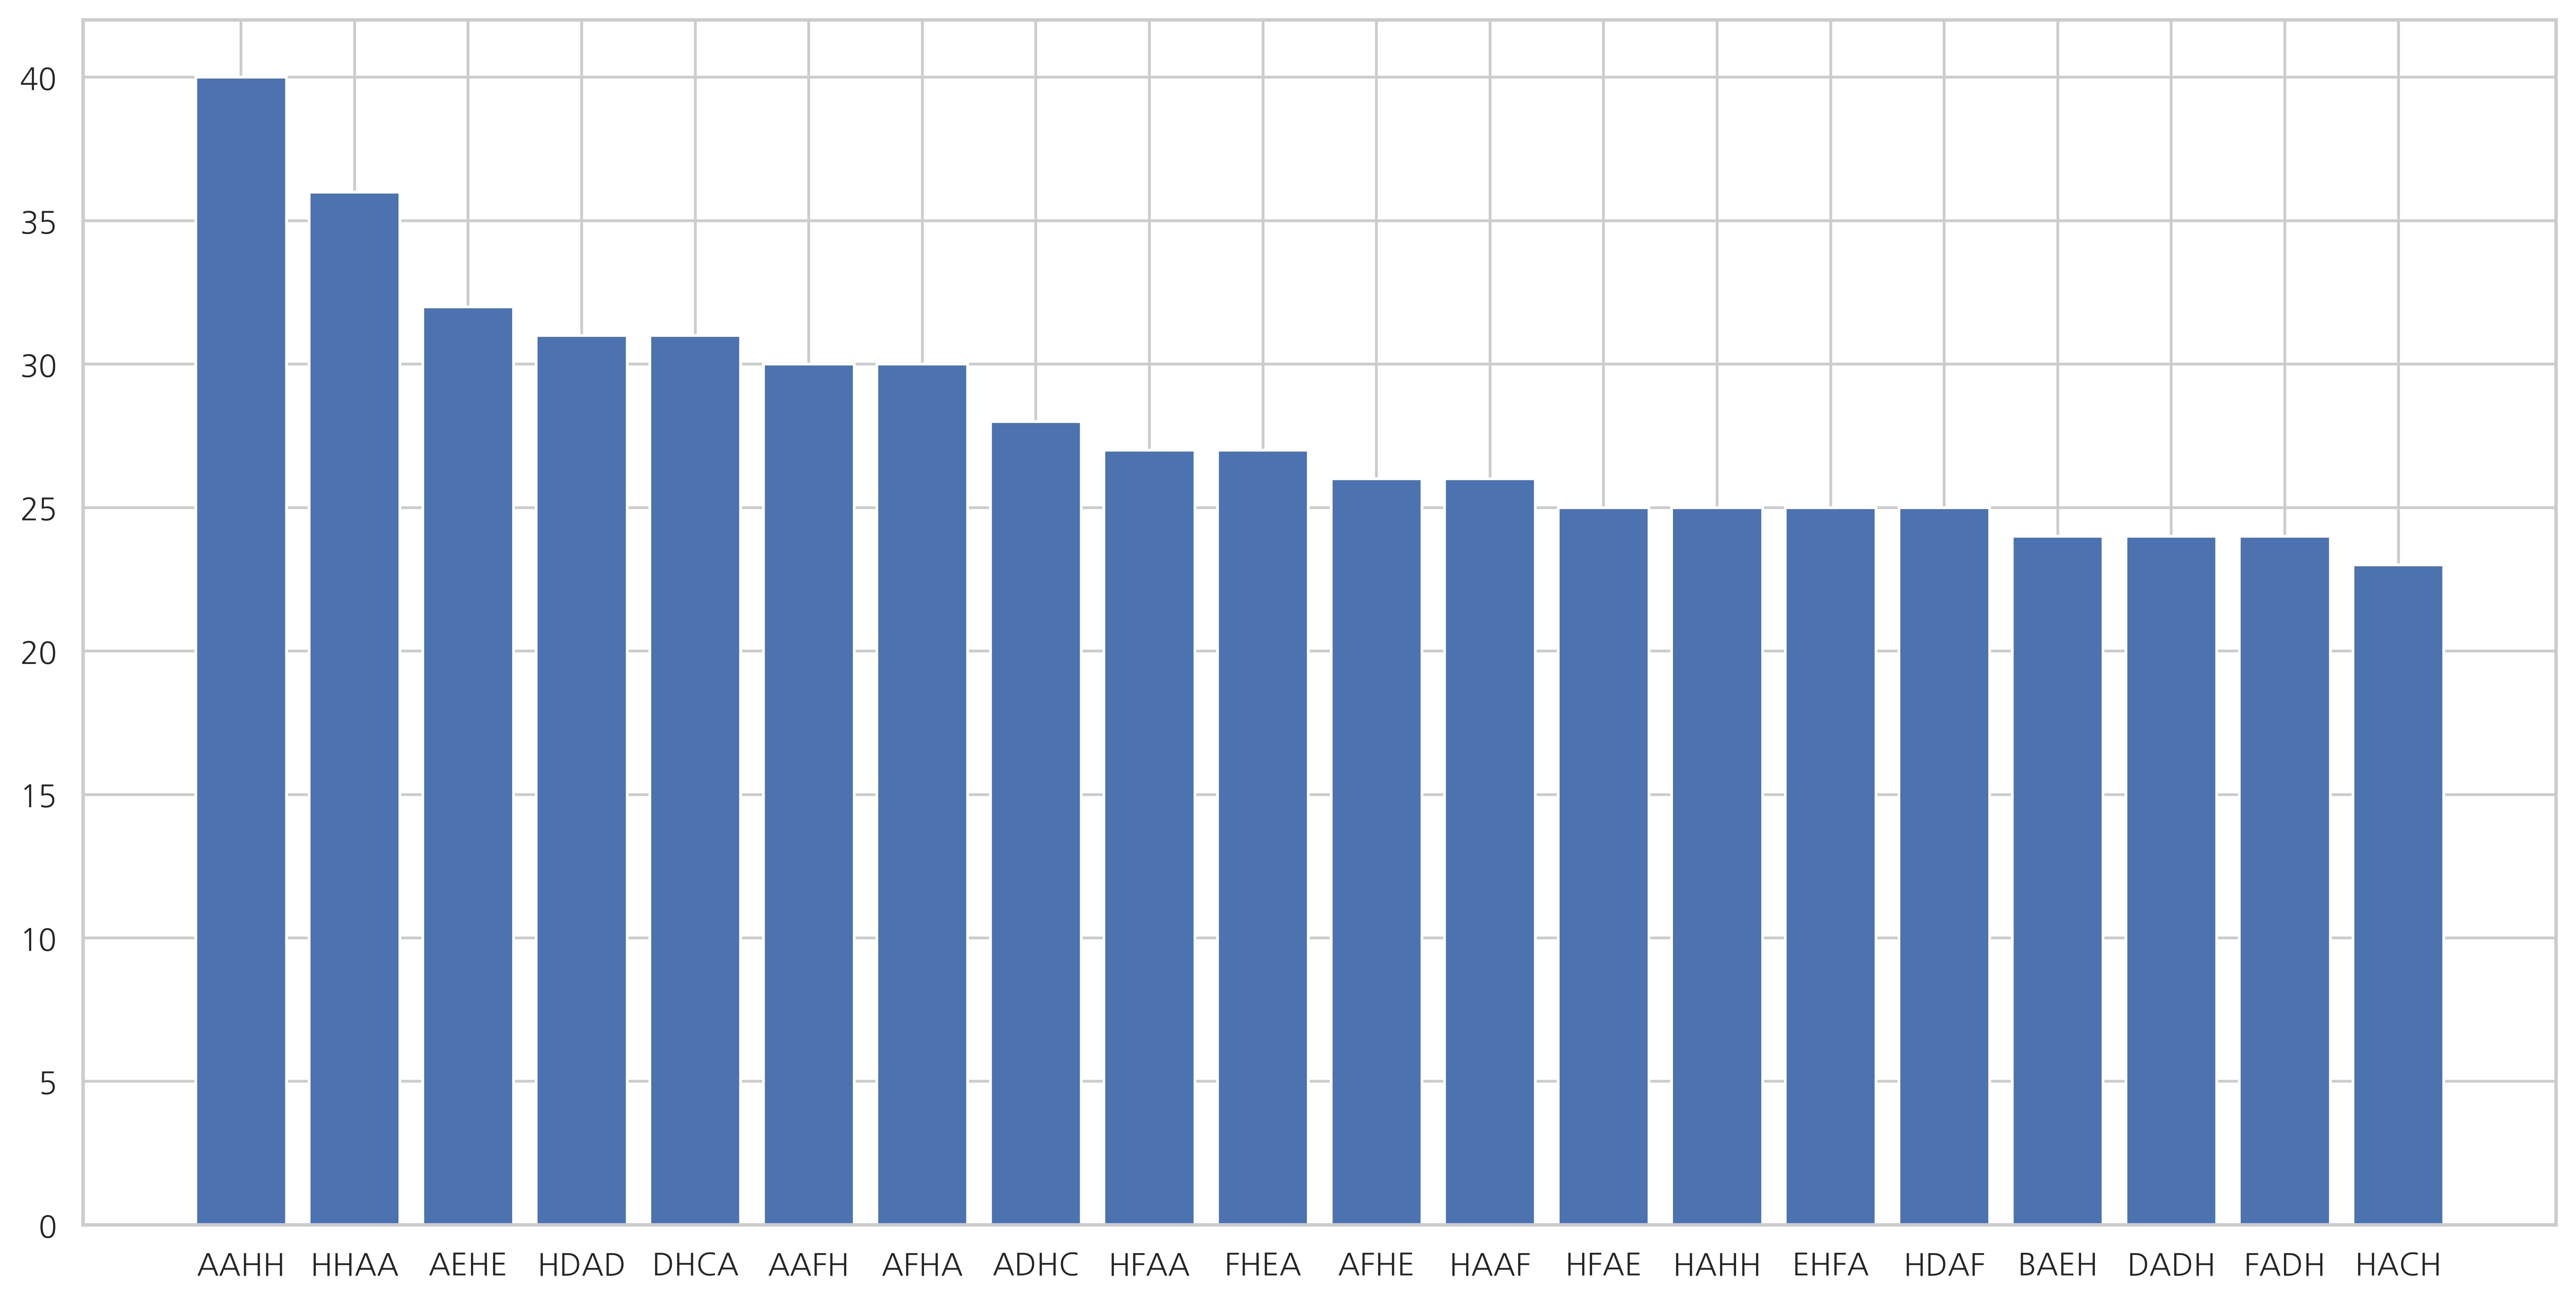

In [28]:
plt.figure(figsize = (16, 8))
plt.bar(방향["방향"][:20], 방향["count"][:20])
plt.show()